<a href="https://colab.research.google.com/github/Rogerio-mack/game_analysis/blob/main/Game_analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Study hypotheses

Three research questions were investigated in this study:

1. Whether the interaction device influences the player's experience;
2. Whether player performance impacts the gaming experience;
3. Whether there is a difference between gender related to preference for the interaction device or challenge perception;
4. Whether the gender influences the player's experience.

In [78]:
df = pd.read_excel('https://github.com/Rogerio-mack/game_analysis/raw/main/data/DadosUsabilidade.xlsx',sheet_name="Perfil de Participante")
df = df.iloc[:,[3,5,7]]
df.head()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,Gênero,Frequência que usa jogos de computador,Frequência que usa jogos em dispositivos móveis (smartphone e/ou tablet)
0,Feminino,Regularmente (algumas vezes por semana),Nunca
1,Masculino,Regularmente (algumas vezes por semana),Regularmente (algumas vezes por semana)
2,Masculino,Ocasionalmente (algumas vezes por mês),Raramente (algumas vezes por ano)
3,Masculino,Frequente (todos os dias),Raramente (algumas vezes por ano)
4,Masculino,Ocasionalmente (algumas vezes por mês),Ocasionalmente (algumas vezes por mês)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [79]:
df.columns = ['Gender','Frequency Computer Games','Frequency Mobile Game Devices']
df.head()

,Gender,Frequency Computer Games,Frequency Mobile Game Devices
0,Feminino,Regularmente (algumas vezes por semana),Nunca
1,Masculino,Regularmente (algumas vezes por semana),Regularmente (algumas vezes por semana)
2,Masculino,Ocasionalmente (algumas vezes por mês),Raramente (algumas vezes por ano)
3,Masculino,Frequente (todos os dias),Raramente (algumas vezes por ano)
4,Masculino,Ocasionalmente (algumas vezes por mês),Ocasionalmente (algumas vezes por mês)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [80]:
df['Frequency Computer Games'].value_counts()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,count
Frequency Computer Games,
Regularmente (algumas vezes por semana),16
Ocasionalmente (algumas vezes por mês),15
Frequente (todos os dias),11
Raramente (algumas vezes por ano),4
Nunca,3


In [81]:
df['Frequency Computer Games'].replace('Regularmente (algumas vezes por semana)','Regularly',inplace=True)
df['Frequency Computer Games'].replace('Raramente (algumas vezes por ano)','Rarely',inplace=True)
df['Frequency Computer Games'].replace('Nunca','Never',inplace=True)
df['Frequency Computer Games'].replace('Ocasionalmente (algumas vezes por mês)','Ocasionally',inplace=True)
df['Frequency Computer Games'].replace('Frequente (todos os dias)','Frequently',inplace=True)
df['Frequency Computer Games'].value_counts()

df['Frequency Mobile Game Devices'].replace('Regularmente (algumas vezes por semana)','Regularly',inplace=True)
df['Frequency Mobile Game Devices'].replace('Raramente (algumas vezes por ano)','Rarely',inplace=True)
df['Frequency Mobile Game Devices'].replace('Nunca','Never',inplace=True)
df['Frequency Mobile Game Devices'].replace('Ocasionalmente (algumas vezes por mês)','Ocasionally',inplace=True)
df['Frequency Mobile Game Devices'].replace('Frequente (todos os dias)','Frequently',inplace=True)
df['Frequency Mobile Game Devices'].value_counts()

df['Gender'] = df['Gender'].replace(['Masculino','Feminino'],['Male','Female'])
df.head()

/tmp/ipython-input-702030122.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Frequency Computer Games'].replace('Regularmente (algumas vezes por semana)','Regularly',inplace=True)
/tmp/ipython-input-702030122.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

,Gender,Frequency Computer Games,Frequency Mobile Game Devices
0,Female,Regularly,Never
1,Male,Regularly,Regularly
2,Male,Ocasionally,Rarely
3,Male,Frequently,Rarely
4,Male,Ocasionally,Ocasionally


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


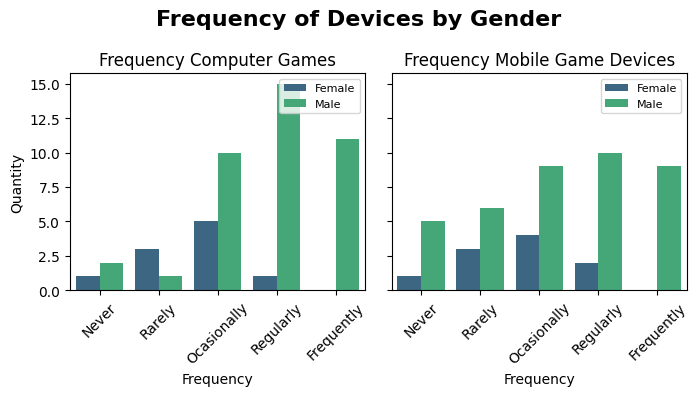

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [82]:
fig, axes = plt.subplots(1, 2, figsize=(7,4),sharey=True)

order = ['Never', 'Rarely', 'Ocasionally', 'Regularly', 'Frequently']

sns.countplot(x='Frequency Computer Games', hue='Gender', data=df, ax=axes[0], palette='viridis', order=order)
axes[0].set_title('Frequency Computer Games')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Quantity')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(x='Frequency Mobile Game Devices', hue='Gender', data=df, ax=axes[1], palette='viridis', order=order)
axes[1].set_title('Frequency Mobile Game Devices')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Quantity')
axes[1].tick_params(axis='x', rotation=45)

axes[0].legend(loc='upper right',fontsize=8)
axes[1].legend(loc='upper right',fontsize=8)

plt.suptitle('Frequency of Devices by Gender',fontsize=16,weight='bold')

plt.tight_layout()
plt.show()

# Scoring guidelines GEQ Post-game Module

The post-game Module consists of four components; the items for each are listed below. Component **scores are computed as the average value of its items**.

- Positive Experience: Items 1, 5, 7, 8, 12, 16.
- Negative Experience: Items 2, 4, 6, 11, 14, 15.
- Tiredness: Items 10, 13.
- Returning to Reality: Items 3, 9, and 17



In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, pearsonr, chi2_contingency
import itertools



In [46]:
from IPython.display import display, Latex, HTML
import warnings

def gera_df_stats_latex(df_stats, titulo):

  warnings.filterwarnings('ignore')
  # latex_table = df_stats.style.to_latex(hrules=True)
  latex_table = df_stats.to_latex(index=None)
  # display(Latex(latex_table))

  latex_table = latex_table.replace('tabular','array')
  latex_table = latex_table.replace('toprule','hline')
  latex_table = latex_table.replace('midrule','hline')
  latex_table = latex_table.replace('bottomrule','hline')

  latex_table = '\\textbf{' + titulo + '} \\\\' + latex_table

  warnings.filterwarnings('default')
  return latex_table

# Calculate component scores

In [47]:
df = pd.read_excel('https://github.com/Rogerio-mack/game_analysis/raw/main/data/DadosUsabilidade.xlsx',sheet_name="Game Experience Questionnaire")
df.head()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,Carimbo de data/hora,TIA,Acabei de jogar com o dispositivo:,1. Me senti revigorado após a experiência com o jogo,2. Senti desconforto ou mal-estar após a experiência com o jogo,"3. Tive dificuldade em retornar à realidade após a experiência com o jogo. Em outras palavras, o jogo foi envolvente a ponto de eu não perceber que sai do jogo e voltei à realidade.",4. Senti algum grau de culpa após a experiência com o jogo,5. Experimentei uma sensação de vitória após a experiência com o jogo,6. Considerei a experiência com o jogo uma perda de tempo,7. Senti um aumento de energia após a experiência com o jogo,8. Fiquei satisfeito com a experiência proporcionada pelo jogo,9. Me senti desorientado durante ou após a experiência com o jogo,10. Senti exaustão física ou mental após a experiência com o jogo,11. Achei que poderia ter tido um desempenho melhor após finalizar o jogo,"12. Me senti poderoso após finalizar o jogo, ou seja, tive uma sensação de realização, conquista ou competência significativa ao finalizar o jogo",13. Senti fadiga significativa após a experiência com o jogo,14. Fiquei decepcionado com a experiência proporcionada pelo jogo,15. Me senti envergonhado durante ou após a experiência com o jogo,16. Senti orgulho das minhas conquistas (pontuação) durante a experiência com o jogo,"17. Tive a sensação de ter vivido uma experiência intensa e imersiva, tal como retornar de uma jornada"
0,2023-08-21 16:54:47.100,42118816,Skate,5,1,1,1,5,3,1,5,1,1,5,3,1,1,1,4,2
1,2023-08-21 16:59:33.861,42118816,Joystick,1,1,1,1,4,3,1,3,1,1,3,1,1,4,1,3,1
2,2023-08-21 17:05:08.876,42118816,Teclado,2,1,1,1,1,4,1,4,1,1,1,1,1,3,1,3,1
3,2023-08-22 13:57:56.988,42145333,Joystick,2,1,1,1,2,1,2,2,1,1,3,1,1,1,1,2,1
4,2023-08-22 14:03:30.943,42145333,Teclado,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,3,1


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [48]:
Positive_Experience = np.array([1, 5, 7, 8, 12, 16])
Negative_Experience = np.array([2, 4, 6, 11, 14, 15])
Tiredness = np.array([10, 13])
Returning_to_Reality= np.array([3, 9, 17])

## Some df transformations



In [49]:
df.columns = ['date_time', 'TIA', 'device'] + list(np.arange(1,18,1))
df.device = df.device.replace(['Skate','Joystick','Teclado'], ['skate','joystick','keyboard'])
df.head()

,date_time,TIA,device,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2023-08-21 16:54:47.100,42118816,skate,5,1,1,1,5,3,1,5,1,1,5,3,1,1,1,4,2
1,2023-08-21 16:59:33.861,42118816,joystick,1,1,1,1,4,3,1,3,1,1,3,1,1,4,1,3,1
2,2023-08-21 17:05:08.876,42118816,keyboard,2,1,1,1,1,4,1,4,1,1,1,1,1,3,1,3,1
3,2023-08-22 13:57:56.988,42145333,joystick,2,1,1,1,2,1,2,2,1,1,3,1,1,1,1,2,1
4,2023-08-22 14:03:30.943,42145333,keyboard,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,3,1


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [50]:
df['Positive_Experience'] = df[Positive_Experience].mean(axis=1)
df['Negative_Experience'] = df[Negative_Experience].mean(axis=1)
df['Tiredness'] = df[Tiredness].mean(axis=1)
df['Returning_to_Reality'] = df[Returning_to_Reality].mean(axis=1)

df.head()


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,date_time,TIA,device,1,2,3,4,5,6,7,...,12,13,14,15,16,17,Positive_Experience,Negative_Experience,Tiredness,Returning_to_Reality
0,2023-08-21 16:54:47.100,42118816,skate,5,1,1,1,5,3,1,...,3,1,1,1,4,2,3.833333,2.000000,1.0,1.333333
1,2023-08-21 16:59:33.861,42118816,joystick,1,1,1,1,4,3,1,...,1,1,4,1,3,1,2.166667,2.166667,1.0,1.000000
2,2023-08-21 17:05:08.876,42118816,keyboard,2,1,1,1,1,4,1,...,1,1,3,1,3,1,2.000000,1.833333,1.0,1.000000
3,2023-08-22 13:57:56.988,42145333,joystick,2,1,1,1,2,1,2,...,1,1,1,1,2,1,1.833333,1.333333,1.0,1.000000
4,2023-08-22 14:03:30.943,42145333,keyboard,1,1,1,1,2,1,1,...,1,1,1,1,3,1,1.666667,1.000000,1.0,1.000000


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [51]:
df_experience = df.copy()

# Show Post Game Scores distribution

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to repr

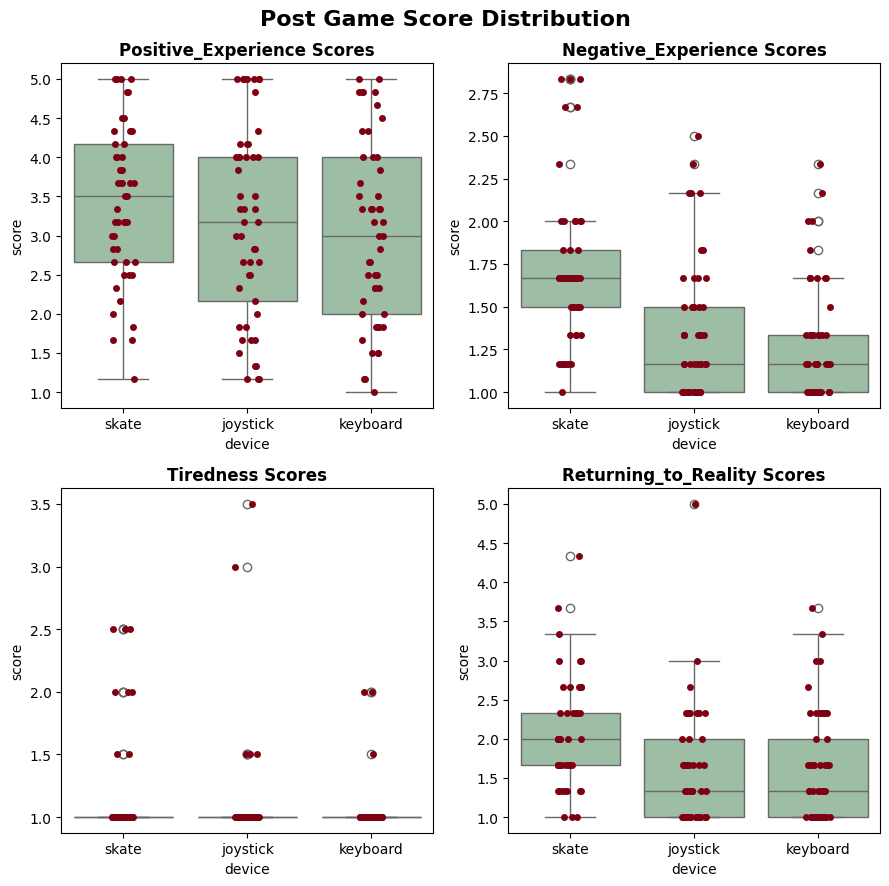

In [52]:
fig, axes = plt.subplots(2,2,figsize=(9,9))

for ax, post_game in zip(axes.flatten(),df.columns[-4::]):
  sns.boxplot(x='device', y=post_game, data=df, color='#99c2a2',ax=ax) #, meanprops={"markersize":200})
  sns.stripplot(x='device', y=post_game, data=df, color='#7d0013', ax=ax)
  ax.set_title(post_game + ' Scores',weight='bold')
  ax.set_xlabel('device')
  ax.set_ylabel('score')

plt.suptitle('Post Game Score Distribution',fontsize=16,weight='bold')
plt.tight_layout()
plt.show()



In [53]:
fig.savefig('post_game_scores.png')

In [54]:
df_post_game_scores = pd.DataFrame(columns=['post_game','device','mean','std'])

for post_game, device in itertools.product(df.columns[-4::],['skate','joystick','keyboard']):
  df_post_game_scores.loc[len(df_post_game_scores)] = [post_game,device,df[ df.device == device ][post_game].mean(),df[ df.device == device ][post_game].std()]

# df_post_game_scores

latex_post_game_scores = gera_df_stats_latex(df_post_game_scores,'Post Game value distributions')
display(Latex(latex_post_game_scores))

<IPython.core.display.Latex object>

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


# 1. Whether the interaction device influences the player's experience

**`ANOVA one-way method`** applied.

There is evidence that device influences *Negative Experience* and *Return to Reality*.

In [55]:
# ANOVA by device and post_game
df_device_post_game = pd.DataFrame(columns=['post_game','f-stat','p-value'])

for post_game in df.columns[-4::]:
  f_stat, p_value = f_oneway(df[df['device'] == 'skate'][post_game],
                            df[df['device'] == 'joystick'][post_game],
                            df[df['device'] == 'keyboard'][post_game])
  if p_value < 0.05:
      print(f"Device type influences the {post_game}. f-stat = {f_stat:.6f} p-value = {p_value:.6f}")
  else:
      print(f"Device type does not influence the {post_game}. f-stat = {f_stat:.6f} p-value = {p_value:.6f}")

  df_device_post_game.loc[len(df_device_post_game)] = [post_game,np.round(f_stat,4),np.round(p_value,4)]

print()
print()

df_device_post_game['Significance'] = df_device_post_game['p-value'] < 0.05

latex_device_post_game = gera_df_stats_latex(df_device_post_game,'Whether the interaction device influences the player\'s experience')
display(Latex(latex_device_post_game))

Device type does not influence the Positive_Experience. f-stat = 1.593921 p-value = 0.206690
Device type influences the Negative_Experience. f-stat = 15.448490 p-value = 0.000001
Device type does not influence the Tiredness. f-stat = 1.261331 p-value = 0.286387
Device type influences the Returning_to_Reality. f-stat = 6.505133 p-value = 0.001974




/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


<IPython.core.display.Latex object>

In [56]:
latex_device_post_game

"\\textbf{Whether the interaction device influences the player's experience} \\\\\\begin{array}{llrrr}\n\\hline\n & post_game & f-stat & p-value & Significance \\\\\n\\hline\n0 & Positive_Experience & 1.593900 & 0.206700 & False \\\\\n1 & Negative_Experience & 15.448500 & 0.000000 & True \\\\\n2 & Tiredness & 1.261300 & 0.286400 & False \\\\\n3 & Returning_to_Reality & 6.505100 & 0.002000 & True \\\\\n\\hline\n\\end{array}\n"

$\textbf{Whether the interaction device influences the player's experience} \\\begin{array}{lrrl}
\hline
            post\_game &  f-stat &  p-value &  Significance \\
\hline
  Positive\_Experience &  1.5939 &   0.2067 &         False \\
  Negative\_Experience & 15.4485 &   0.0000 &          True \\
            Tiredness &  1.2613 &   0.2864 &         False \\
 Returning\_to\_Reality &  6.5051 &   0.0020 &          True \\
\hline
\end{array}$


# 2. Whether player performance impacts the gaming experience

**`Pearson method`**  

Only in 3 cases (True Significance on table bellow) the  gamer performance did influence the post game experience.



In [57]:
dfs = pd.read_excel('https://github.com/Rogerio-mack/game_analysis/raw/main/data/Skate.xlsx')
dfs = dfs.iloc[:,range(0,4)]
dfs['device'] = 'skate'
dfs.head()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,RA,pontuacao,tempo_obstaculo,tempo_total,device
0,21505616,2,12.44,12.44,skate
1,21505616,13,42.01,54.45,skate
2,21505616,26,49.09,103.54,skate
3,32143621,0,5.45,5.45,skate
4,32143621,3,13.99,19.44,skate


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [58]:
dfj = pd.read_excel('https://github.com/Rogerio-mack/game_analysis/raw/main/data/Joystick.xlsx')
dfj = dfj.iloc[:,range(0,4)]
dfj['device'] = 'joystick'
dfj.head()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,RA,pontuacao,tempo_obstaculo,tempo_total,device
0,21505616,0,5.73,5.73,joystick
1,21505616,0,3.23,8.96,joystick
2,21505616,0,3.49,12.45,joystick
3,32143621,5,22.94,22.94,joystick
4,32143621,9,18.03,40.97,joystick


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [59]:
dfk = pd.read_excel('https://github.com/Rogerio-mack/game_analysis/raw/main/data/Teclado.xlsx')
dfk = dfk.iloc[:,range(0,4)]
dfk['device'] = 'keyboard'
dfk.head()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,RA,pontuacao,tempo_obstaculo,tempo_total,device
0,21505616,1,8.94,8.94,keyboard
1,21505616,1,3.51,12.45,keyboard
2,21505616,2,7.01,19.46,keyboard
3,32143621,34,124.45,124.45,keyboard
4,32143621,34,3.51,127.96,keyboard


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [60]:
print('Skate    rounds played: ', len(dfs))
print('Joystick rounds played: ', len(dfj))
print('Keyboard rounds played: ', len(dfk))

Skate    rounds played:  132
Joystick rounds played:  129
Keyboard rounds played:  129


In [61]:
d2 = pd.concat([dfs, dfj, dfk])
d2.head()

,RA,pontuacao,tempo_obstaculo,tempo_total,device
0,21505616,2,12.44,12.44,skate
1,21505616,13,42.01,54.45,skate
2,21505616,26,49.09,103.54,skate
3,32143621,0,5.45,5.45,skate
4,32143621,3,13.99,19.44,skate


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [62]:
print('Post game answers: ', len(df))

Post game answers:  147


In [63]:
df.head()

,date_time,TIA,device,1,2,3,4,5,6,7,...,12,13,14,15,16,17,Positive_Experience,Negative_Experience,Tiredness,Returning_to_Reality
0,2023-08-21 16:54:47.100,42118816,skate,5,1,1,1,5,3,1,...,3,1,1,1,4,2,3.833333,2.000000,1.0,1.333333
1,2023-08-21 16:59:33.861,42118816,joystick,1,1,1,1,4,3,1,...,1,1,4,1,3,1,2.166667,2.166667,1.0,1.000000
2,2023-08-21 17:05:08.876,42118816,keyboard,2,1,1,1,1,4,1,...,1,1,3,1,3,1,2.000000,1.833333,1.0,1.000000
3,2023-08-22 13:57:56.988,42145333,joystick,2,1,1,1,2,1,2,...,1,1,1,1,2,1,1.833333,1.333333,1.0,1.000000
4,2023-08-22 14:03:30.943,42145333,keyboard,1,1,1,1,2,1,1,...,1,1,1,1,3,1,1.666667,1.000000,1.0,1.000000


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [64]:
df3 = d2.merge(df, how='inner', left_on=['RA','device'], right_on=['TIA','device'])
df3.head()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,RA,pontuacao,tempo_obstaculo,tempo_total,device,date_time,TIA,1,2,3,...,12,13,14,15,16,17,Positive_Experience,Negative_Experience,Tiredness,Returning_to_Reality
0,21505616,2,12.44,12.44,skate,2023-09-04 17:04:55.582,21505616,5,1,1,...,3,1,3,4,2,3,3.166667,2.833333,1.0,1.666667
1,21505616,13,42.01,54.45,skate,2023-09-04 17:04:55.582,21505616,5,1,1,...,3,1,3,4,2,3,3.166667,2.833333,1.0,1.666667
2,21505616,26,49.09,103.54,skate,2023-09-04 17:04:55.582,21505616,5,1,1,...,3,1,3,4,2,3,3.166667,2.833333,1.0,1.666667
3,32143621,0,5.45,5.45,skate,2023-09-04 13:13:00.842,32143621,4,1,3,...,1,1,1,3,1,2,2.666667,2.000000,1.0,2.666667
4,32143621,3,13.99,19.44,skate,2023-09-04 13:13:00.842,32143621,4,1,3,...,1,1,1,3,1,2,2.666667,2.000000,1.0,2.666667


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [65]:
df3 = df3[[                  'RA',            'pontuacao',      'tempo_obstaculo',
                'tempo_total',               'device',
        'Positive_Experience',  'Negative_Experience',            'Tiredness',
       'Returning_to_Reality']]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [66]:
df_mean = df3.groupby(['RA','device']).mean().reset_index()
df_mean.head()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,RA,device,pontuacao,tempo_obstaculo,tempo_total,Positive_Experience,Negative_Experience,Tiredness,Returning_to_Reality
0,21505616,joystick,0.000000,4.150000,9.046667,5.000000,1.333333,1.0,2.333333
1,21505616,keyboard,1.333333,6.486667,13.616667,4.666667,2.000000,1.0,2.333333
2,21505616,skate,13.666667,34.513333,56.810000,3.166667,2.833333,1.0,1.666667
3,23513365,joystick,2.333333,8.816667,17.110000,5.000000,1.000000,1.0,2.333333
4,23513365,keyboard,34.000000,43.820000,127.963333,5.000000,1.000000,1.0,2.333333


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [67]:
import itertools

df_perf_exp = pd.DataFrame(columns=['post_game','device','Pearson','p-value'])

for post_game, device in itertools.product(df_mean.columns[-4::],['skate','joystick','keyboard']):
  correlation, p_value = pearsonr(df_mean[ df_mean.device == device ]['pontuacao'], df_mean[ df_mean.device == device ][post_game])
  df_perf_exp.loc[len(df_perf_exp)] = [post_game, device, correlation, p_value]

  if p_value < 0.05:
      print(f"Gaming on {device}, the gamer performance influences the {post_game} perception. Correlation (pearson) = {correlation:.6f} p-value = {p_value:.6f}")
  else:
      print(f"Gaming on {device}, the gamer performance does not influence the {post_game} perception. Correlation (pearson) = {correlation:.6f} p-value = {p_value:.6f}")

df_perf_exp['Significance'] = df_perf_exp['p-value'] < 0.05

df_perf_exp

Gaming on skate, the gamer performance influences the Positive_Experience perception. Correlation (pearson) = 0.327843 p-value = 0.036392
Gaming on joystick, the gamer performance does not influence the Positive_Experience perception. Correlation (pearson) = -0.099320 p-value = 0.536694
Gaming on keyboard, the gamer performance does not influence the Positive_Experience perception. Correlation (pearson) = -0.074157 p-value = 0.653676
Gaming on skate, the gamer performance does not influence the Negative_Experience perception. Correlation (pearson) = -0.073951 p-value = 0.645874
Gaming on joystick, the gamer performance influences the Negative_Experience perception. Correlation (pearson) = 0.384823 p-value = 0.012978
Gaming on keyboard, the gamer performance influences the Negative_Experience perception. Correlation (pearson) = -0.346538 p-value = 0.030681
Gaming on skate, the gamer performance does not influence the Tiredness perception. Correlation (pearson) = 0.281537 p-value = 0.074

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,post_game,device,Pearson,p-value,Significance
0,Positive_Experience,skate,0.327843,0.036392,True
1,Positive_Experience,joystick,-0.099320,0.536694,False
2,Positive_Experience,keyboard,-0.074157,0.653676,False
3,Negative_Experience,skate,-0.073951,0.645874,False
4,Negative_Experience,joystick,0.384823,0.012978,True
5,Negative_Experience,keyboard,-0.346538,0.030681,True
6,Tiredness,skate,0.281537,0.074548,False
7,Tiredness,joystick,0.252460,0.111282,False
8,Tiredness,keyboard,-0.099879,0.545202,False
9,Returning_to_Reality,skate,0.114988,0.474058,False


In [68]:
latex_table = gera_df_stats_latex(df_perf_exp,'Pearson correlation, performance versus experience by device')
display(Latex(latex_table))

<IPython.core.display.Latex object>

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


# 3. Whether there is a difference between gender related to preference for the interaction device or challenge perception

**`Chi-square method`** applied

**Issue** (*warning*): There a more participant profiles (49) than valid preference answers (45). This results in only 44 match cases.

**Results**

There is no evidence that gender influences both device preference or how challenging the gaming experience is.

In [69]:
d1 = pd.read_excel('https://github.com/Rogerio-mack/game_analysis/raw/main/data/DadosUsabilidade.xlsx',sheet_name="Perfil de Participante")
d1 = d1[['TIA','Gênero']]

display( d1.head() )
print( len(d1) )

,TIA,Gênero
0,42118816,Feminino
1,42145333,Masculino
2,42326321,Masculino
3,32339623,Masculino
4,42305535,Masculino


49


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [70]:
d2 = pd.read_excel('https://github.com/Rogerio-mack/game_analysis/raw/main/data/DadosUsabilidade.xlsx',sheet_name="Preferência")
d2.columns = ['date_time', 'TIA', 'joystick_p', 'keyboard_p', 'skate_p', 'joystick_d', 'keyboard_d', 'skate_d', 'comments']
d2 = d2.drop(columns='comments')

d2 = d2.dropna() # TIA NaN
d2.TIA = d2.TIA.astype('int')

display( d2.head() )
print( len(d2) )

,date_time,TIA,joystick_p,keyboard_p,skate_p,joystick_d,keyboard_d,skate_d
1,2023-08-22 14:12:44.482,42145333,3,2,1,3,3,1
2,2023-08-22 15:05:52.265,32339623,3,2,1,2,3,1
3,2023-08-22 15:26:46.963,42305535,1,2,3,2,1,3
4,2023-08-22 15:47:32.495,42308720,2,3,1,2,3,1
5,2023-09-04 11:45:23.579,32229011,2,1,3,2,3,1


45


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [71]:
d2['preference'] = (d2[[x for x in d2.columns if '_p' in x]] == 1).idxmax(axis=1)
d2['challenger'] = (d2[[x for x in d2.columns if '_d' in x]] == 1).idxmax(axis=1)

d2 = d2[['TIA','preference','challenger']]
d2.head()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,TIA,preference,challenger
1,42145333,skate_p,skate_d
2,32339623,skate_p,skate_d
3,42305535,joystick_p,keyboard_d
4,42308720,skate_p,skate_d
5,32229011,keyboard_p,skate_d


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [72]:
df = d2.merge(d1, how='inner', left_on='TIA', right_on='TIA')
df = df.rename(columns={'Gênero':'sex'})

display( df.head() )
print( len(df) )

,TIA,preference,challenger,sex
0,42145333,skate_p,skate_d,Masculino
1,32339623,skate_p,skate_d,Masculino
2,42305535,joystick_p,keyboard_d,Masculino
3,42308720,skate_p,skate_d,Masculino
4,32229011,keyboard_p,skate_d,Masculino


44


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [73]:
df_gender_pos = pd.DataFrame(columns=['Related','chi2','p-value'])

contingency_table = pd.crosstab(df['sex'], df['preference'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

if p_value < 0.05:
    print(f"There is evidence that gender influences device preference. Chi-square: {chi2:.6f} p-value = {p_value:.6f}")
else:
    print(f"There is no evidence that gender influences device preference. Chi-square: {chi2:.6f} p-value = {p_value:.6f}")

df_gender_pos.loc[len(df_gender_pos)] = ['device preference',np.round(chi2,4),np.round(p_value,4)]


contingency_table = pd.crosstab(df['sex'], df['challenger'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

if p_value < 0.05:
    print(f"There is evidence that gender influences opinions about how challenging the gaming experience is. Chi-square: {chi2:.6f} p-value = {p_value:.6f}")
else:
    print(f"There is no evidence that gender influences opinions about how challenging the gaming experience is. Chi-square: {chi2:.6f} p-value = {p_value:.6f}")

df_gender_pos.loc[len(df_gender_pos)] = ['challenging perception',np.round(chi2,4),np.round(p_value,4)]

print()
print()

df_gender_pos['Significance'] = df_gender_pos['p-value'] < 0.05

latex_gender_pos = gera_df_stats_latex(df_gender_pos,'Whether there is a difference between gender related to preference for the interaction device or challenge perception')
display(Latex(latex_gender_pos))

There is no evidence that gender influences device preference. Chi-square: 0.158307 p-value = 0.923898
There is no evidence that gender influences opinions about how challenging the gaming experience is. Chi-square: 1.786466 p-value = 0.409330




/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


<IPython.core.display.Latex object>

# 4. Whether the gender influences the player's experience

**`ANOVA one-way method`** applied.

**Results**

There is no evidence that gender influences any post game experience.

In [74]:
d1 = pd.read_excel('https://github.com/Rogerio-mack/game_analysis/raw/main/data/DadosUsabilidade.xlsx',sheet_name="Perfil de Participante")
d1 = d1[['TIA','Gênero']]
d1.columns = ['TIA','sex']

display( d1.head() )
print( len(d1) )

,TIA,sex
0,42118816,Feminino
1,42145333,Masculino
2,42326321,Masculino
3,32339623,Masculino
4,42305535,Masculino


49


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [75]:
df = d1.merge(df_experience)
df.head()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,TIA,sex,date_time,device,1,2,3,4,5,6,...,12,13,14,15,16,17,Positive_Experience,Negative_Experience,Tiredness,Returning_to_Reality
0,42118816,Feminino,2023-08-21 16:54:47.100,skate,5,1,1,1,5,3,...,3,1,1,1,4,2,3.833333,2.000000,1.0,1.333333
1,42118816,Feminino,2023-08-21 16:59:33.861,joystick,1,1,1,1,4,3,...,1,1,4,1,3,1,2.166667,2.166667,1.0,1.000000
2,42118816,Feminino,2023-08-21 17:05:08.876,keyboard,2,1,1,1,1,4,...,1,1,3,1,3,1,2.000000,1.833333,1.0,1.000000
3,42145333,Masculino,2023-08-22 13:57:56.988,joystick,2,1,1,1,2,1,...,1,1,1,1,2,1,1.833333,1.333333,1.0,1.000000
4,42145333,Masculino,2023-08-22 14:03:30.943,keyboard,1,1,1,1,2,1,...,1,1,1,1,3,1,1.666667,1.000000,1.0,1.000000


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [76]:
# ANOVA
df_gender_exp = pd.DataFrame(columns=['Post-game','f-stat','p-value'])

for post_game in df.columns[-4::]:
  f_stat, p_value = f_oneway(df[df['sex'] == 'Feminino'][post_game],
                            df[df['sex'] == 'Masculino'][post_game])
  if p_value < 0.05:
      print(f"Genger influences the {post_game}. f-stat = {f_stat:.6f} p-value = {p_value:.6f}")
  else:
      print(f"Gender does not influence the {post_game}. f-stat = {f_stat:.6f} p-value = {p_value:.6f}")

  df_gender_exp.loc[len(df_gender_exp)] = [post_game,np.round(f_stat,4),np.round(p_value,4)]

df_gender_exp['Significance'] = df_gender_exp['p-value'] < 0.05

print()
print()

latex_gender_exp = gera_df_stats_latex(df_gender_exp,'Whether there is a difference between gender related to preference for the interaction device or challenge perception')
display(Latex(latex_gender_exp))

Gender does not influence the Positive_Experience. f-stat = 0.605132 p-value = 0.437912
Gender does not influence the Negative_Experience. f-stat = 0.366572 p-value = 0.545839
Gender does not influence the Tiredness. f-stat = 0.000083 p-value = 0.992741
Gender does not influence the Returning_to_Reality. f-stat = 1.425508 p-value = 0.234476




/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


<IPython.core.display.Latex object>